In [4]:
# importação das bilbiotecas
#data
import numpy as np
import pandas as pd

#plot
import seaborn as sns
import matplotlib.pyplot as plt

#ml
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from tqdm import tqdm


#aux
from IPython.display import clear_output
import os
import pickle

## carregar dataset

### treinamento o word embbeding próprio treinado com skip-gram

In [5]:
# load the dataframe object from the pickle file
with open(os.path.join('data', 'dataset_param_c_train.pkl'), 'rb') as f:
    dataset = pickle.load(f)

In [4]:
dataset

,tf_idf,wes,wes_own,classes_param_a_1,classes_param_b_1,classes_param_c_1
1757,"[0.1520375028210196, 0.17699962659034899, 0.11...","[[-0.0024, -0.033, 0.0099, 0.0034, -0.1078, -0...","[[-0.15383221, 0.17914692, -0.010291061, 0.344...",1,2,0
573,"[0.17117729139134427, 0.12149402947247992, 0.1...","[[-0.0312, -0.0228, 0.0538, 0.2069, -0.0707, -...","[[0.124431126, 0.1792577, 0.22388884, 0.179398...",0,1,2
357,"[0.056354022158337326, 0.0900773086241686, 0.0...","[[0.0087, -0.015, 0.073, 0.0244, -0.0139, -0.0...","[[-0.2735036, -0.19421376, 0.26711008, 0.26224...",2,0,0
1874,"[0.06280307748585236, 0.5022780351753088, 0.05...","[[0.0033, 0.0033, 0.0621, -0.0199, -0.0136, -0...","[[0.39825365, 0.03401856, -0.08328956, 0.15628...",3,1,3
952,"[0.2162069029386577, 0.17003122409083568, 0.21...","[[0.0426, 0.0016, -0.0254, 0.0166, 0.0386, -0....","[[-0.1674651, -0.041456904, 0.089936934, 0.109...",2,0,3
...,...,...,...,...,...,...
469,"[0.03344511075801128, 0.03344511075801128, 0.0...","[[-0.022, 0.0315, 0.0752, -0.0268, 0.0625, -0....","[[-0.20457007, 0.2068289, -0.22812223, 0.41948...",0,0,0
1523,"[0.1444444525285251, 0.14320885524210786, 0.11...","[[-0.0176, 0.0149, 0.029, -0.018, 0.0394, -0.0...","[[0.15224683, -0.04294147, 0.23700559, 0.45965...",2,3,3
184,"[0.07487472267235452, 0.08646331108472735, 0.0...","[[0.0392, 0.0332, 0.011, -0.0712, 0.1688, 0.10...","[[-0.613815, 0.052886456, 0.1884509, 0.3149106...",1,0,1
1623,"[0.24468841743329098, 0.07221445715635107, 0.0...","[[0.0442, -0.087, 0.0251, 0.015, 0.0006, -0.09...","[[-0.18899466, 0.050661664, 0.13411203, 0.0431...",0,2,2


In [6]:
#X = np.array([x.reshape(x.shape[0], -1, 300) for x in df.iloc[:, 0].values])
X = dataset.iloc[:, 2].values

In [8]:
np.array(X[51]).shape

(49, 100)

In [9]:
X[51]

[[-0.68453753,
  0.055393357,
  0.33304712,
  0.44751438,
  -0.021024648,
  -0.49047387,
  -0.29921973,
  0.7562744,
  -0.8446626,
  0.39803836,
  -0.56546974,
  -0.6267599,
  -0.4446311,
  0.2203117,
  -0.34094337,
  -0.11009056,
  -0.09522413,
  -0.08117499,
  0.15811528,
  -0.56882226,
  -0.05616938,
  0.27585366,
  -0.42443743,
  -0.31396857,
  0.3669693,
  -0.017822519,
  -0.65792054,
  0.15774801,
  0.22833307,
  -0.3761058,
  0.33013228,
  0.5230041,
  0.361444,
  0.6994262,
  -0.24811044,
  0.50295717,
  0.7939841,
  -0.49004132,
  0.19715124,
  0.44135204,
  0.53262794,
  -0.45021826,
  0.08944859,
  -0.25586966,
  -0.26918495,
  0.49751863,
  -0.5060052,
  0.35308135,
  -0.12467632,
  -0.040516663,
  0.5571893,
  -0.12817758,
  -0.32305786,
  0.3942313,
  -0.41850862,
  0.18882385,
  0.98204273,
  0.3312496,
  0.47071287,
  -0.02099872,
  -0.15967695,
  0.22309405,
  0.12531249,
  0.41419715,
  0.16210818,
  -0.28688344,
  0.027591279,
  0.7525992,
  -0.2336384,
  1.4432662,


In [10]:
X = [np.array(x) for x in X]

In [11]:
max_len = max([sentence.shape[0] for sentence in X])
max_len

793

Geralmente o valor 0 é utilizado no padding de word embeddings, pois ele representa a ausência de valor para aquele elemento. O padding é usado para que todas as amostras tenham o mesmo tamanho, por exemplo, para que todas as frases tenham o mesmo número de palavras. Ao usar o valor 0 para o padding, estamos representando que aquela posição é uma palavra "fictícia" que não possui significado. Dessa forma, a rede neural não dará importância a essas palavras fictícias durante o processo de treinamento.

In [12]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, value = 0, padding = 'post', maxlen = max_len)

In [13]:
y = dataset.iloc[:, 5].values

In [14]:
y = np.array(y)
np.unique(y)

array([0, 1, 2, 3], dtype=int64)

In [15]:
X.shape, y.shape

((1441, 793, 100), (1441,))

O TensorFlow não suporta tensores com formas variadas, então todas as listas precisam ter o mesmo tamanho. Para resolver este problema, pode-se usar uma biblioteca de processamento de dados para garantir que todas as listas tenham o mesmo tamanho, ou pode-se remover as listas que têm tamanhos diferentes.

In [16]:
X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)

In [17]:
X_tensor.shape

TensorShape([1441, 793, 100])

 ## treinamento de uma rede neural convolucional

### Camada de convolução

A **camada de convolução** é uma das camadas fundamentais de uma rede neural convolucional (CNN) para classificação de texto. Essa camada é responsável por extrair as características dos dados de entrada, que podem ser, por exemplo, palavras ou frases de um texto. A convolução é uma operação matemática que envolve a multiplicação da entrada com um pequeno filtro (também chamado de kernel ou janela), que se desloca pela entrada em uma determinada direção. A cada posição, o resultado da multiplicação é somado e a saída é produzida.

A camada de convolução pode ter vários filtros diferentes, cada um aprendendo uma característica diferente dos dados. Isso permite que a CNN capture uma variedade de informações importantes do texto, como a presença de palavras-chave, a estrutura gramatical e o contexto em que as palavras são usadas.

O número de filtros recomendados para a camada de convolução em uma rede neural convolucional pode variar dependendo da complexidade do problema e da arquitetura da rede. Não há um número fixo que seja considerado ideal ou padrão, mas é comum utilizar potências de 2, como 32, 64, 128, 256, etc. para o número de filtros em cada camada. O número de filtros também pode ser aumentado à medida que se avança nas camadas da rede, com o objetivo de aprender características mais complexas e abstratas

Além disso, é comum usar outras camadas, como camadas de pooling e camadas de dropout, para aumentar a eficiência e evitar overfitting, que é um problema comum em redes neurais.

Em resumo, a camada de convolução é uma peça fundamental na arquitetura de uma rede neural convolucional para classificação de texto, permitindo a extração de características relevantes dos dados de entrada.

Na arquitetura de uma Rede Neural Convolucional (CNN), a camada de pooling é uma das camadas fundamentais. Essa camada é responsável por reduzir a dimensionalidade espacial do mapa de características gerado pela camada de convolução anterior.

Não há um valor recomendado fixo de kernel_size para todos os casos, pois ele depende do tamanho da sequência, da natureza dos dados e dos objetivos do modelo. Em geral, valores comuns de kernel_size para sequências de texto variam de 2 a 5. No entanto, pode ser necessário testar diferentes valores para encontrar o melhor desempenho para o seu conjunto de dados específico. Além disso, a escolha do kernel_size também pode ser influenciada pelo tamanho da dimensão embutida (word embedding), pelo número de camadas na rede e pelo número de filtros. É importante experimentar diferentes configurações e avaliar o desempenho para encontrar o melhor modelo.

Se a rede neural convolucional não converge com 1000 épocas, significa que o modelo ainda não atingiu a performance desejada após 1000 iterações de treinamento. Neste caso, aumentar o número de **filtros** pode ser uma possível solução, mas existem outros fatores que precisam ser considerados, como o tipo de otimizador, taxa de aprendizado, regularização, e se o conjunto de dados de treinamento é suficientemente grande e representativo. Além disso, é importante verificar se o modelo não está sofrendo de overfitting, ou seja, se ele está generalizando bem para dados não vistos durante o treinamento. Não há uma única resposta para essa questão, e a solução pode envolver uma combinação de diferentes ajustes e experimentos.

### Camada de pooling

A ideia básica da **camada de pooling** é reduzir a resolução espacial da representação do mapa de características, a fim de reduzir a quantidade de parâmetros e poder generalizar melhor o modelo para novos dados. Ela funciona selecionando um valor de um conjunto de valores de características próximos, agrupando-os e reduzindo-os a um único valor representativo. Essa operação é realizada em cada "sub-região" do mapa de características, onde cada sub-região é definida por um filtro.

Existem vários tipos de pooling, sendo os mais comuns o max pooling e o average pooling. No max pooling, é selecionado o valor máximo dentro da sub-região para ser o valor representativo. Já no average pooling, é calculada a média dos valores da sub-região para ser o valor representativo.

A camada de pooling é uma forma de regularização, já que ela reduz a dimensionalidade da representação do mapa de características e, consequentemente, o número de parâmetros a serem treinados. Isso reduz o risco de overfitting, tornando o modelo.

### Camada totalmente conectada

A **camada totalmente conectada** é uma camada de rede neural que recebe as características extraídas pela camada de convolução e/ou de pooling e as usa para realizar a classificação final. Essa camada é composta por neurônios que estão totalmente conectados com os neurônios da camada anterior.

Na tarefa de classificação de texto, a camada totalmente conectada pode ser usada para gerar a pontuação da classe correspondente a cada possível categoria. Por exemplo, em uma tarefa de classificação de texto em que há duas categorias, "positivo" e "negativo", a camada totalmente conectada pode gerar uma pontuação para cada uma dessas categorias. Em seguida, a classe final é escolhida com base na pontuação mais alta.

Uma das desvantagens da camada totalmente conectada é que ela pode causar overfitting (sobreajuste) aos dados de treinamento. Para lidar com esse problema, é comum o uso de técnicas como **dropout** ou **regularização L2** na camada totalmente conectada para reduzir a complexidade do modelo e evitar overfitting.

Não existe um número recomendado exato de **camadas e neurônios** para uma camada densa em uma rede neural, pois isso depende de vários fatores, como o tamanho do conjunto de dados, a complexidade do modelo, a precisão desejada, entre outros. Algumas boas práticas incluem começar com uma camada densa com uma pequena quantidade de neurônios, como 32 ou 64, e aumentar gradativamente até atingir uma boa precisão. É importante também usar **regularização** para evitar **overfitting**. Uma boa prática é experimentar com diferentes configurações e comparar os resultados para escolher a melhor opção.

Aumentar o número de camadas em uma rede neural convolucional pode ser considerado como uma técnica para melhorar a performance do modelo em uma **tarefa de classificação de texto**, mas isso depende de vários fatores, tais como a quantidade de dados disponíveis, a complexidade do modelo e a quantidade de recursos computacionais disponíveis.

A adição de camadas pode permitir que o modelo capture **padrões mais complexos nas sequências de texto**, o que pode levar a uma melhora na acurácia. _No entanto, também é importante ter em mente que a adição de muitas camadas pode tornar o modelo propenso a overfitting, especialmente se a quantidade de dados disponíveis for limitada_.

Além disso, o número de camadas também pode impactar a velocidade de treinamento do modelo e a complexidade computacional. É importante encontrar um equilíbrio entre a capacidade do modelo de aprender padrões importantes e a capacidade de manter uma performance eficiente.

Em geral, é recomendado experimentar diferentes configurações, incluindo diferentes números de camadas, para encontrar a melhor configuração para o problema específico de classificação de texto em questão.

### Dropout

A **técnica de "dropout"** é um método de regularização que é frequentemente utilizado em redes neurais, incluindo as camadas totalmente conectadas. O objetivo do dropout é evitar o overfitting, que é quando a rede se ajusta demais aos dados de treinamento, e não generaliza bem para novos dados.

O dropout funciona desativando aleatoriamente um conjunto de neurônios da camada em cada passagem de treinamento. Isso significa que a camada tem que aprender a confiar em diferentes combinações de neurônios em cada passagem de treinamento, em vez de depender sempre dos mesmos neurônios. Isso faz com que a rede se torne mais robusta, pois não pode confiar em um subconjunto específico de neurônios para a classificação de uma entrada.

Durante o processo de teste, todos os neurônios são ativados, pois não há necessidade de regularização neste momento. Em resumo, o dropout é uma técnica simples e eficaz para reduzir o overfitting em redes neurais, tornando as camadas totalmente conectadas mais robustas e generalizáveis.

O valor recomendado para o dropout_rate varia dependendo da aplicação e dos dados. Em geral, o dropout_rate varia entre 0.2 e 0.5. O dropout_rate de 0.5 significa que 50% dos neurônios serão "desligados" durante o treinamento para evitar overfitting, enquanto o dropout_rate de 0.2 significa que 20% dos neurônios serão desligados. O valor ótimo par'a o dropout_rate deve ser determinado experimentando com diferentes valores e avaliando o desempenho do modelo.

### Regularização L2

Em redes neurais, a **regularização L2** é uma técnica usada para evitar o overfitting, ou seja, o modelo aprender demais o conjunto de treinamento, e não generalizar bem para novos dados. A regularização L2 adiciona um termo à função de custo da rede neural, que penaliza pesos grandes. Especificamente, a função de custo adiciona a soma dos quadrados dos pesos multiplicada por um parâmetro de regularização lambda. Essa penalização faz com que a rede favoreça pesos menores, o que pode ajudar a evitar o overfitting.

Na camada totalmente conectada, onde cada neurônio está conectado a todos os neurônios da camada anterior, a regularização L2 é aplicada aos pesos da camada. Isso ajuda a controlar a complexidade do modelo, evitando que os pesos da rede se tornem muito grandes. Além disso, a regularização L2 pode melhorar o desempenho da rede em conjuntos de dados de teste, onde o modelo não foi treinado, ajudando a rede a generalizar melhor para novos dados.

A recomendação geral é aplicar a regularização L2 em camadas densas ou camadas totalmente conectadas, em vez de nas camadas de convolução. Isso se deve ao fato de que a regularização L2 é mais eficaz na prevenção do overfitting em camadas densas, já que as camadas densas tendem a ter muitos parâmetros e a possibilidade de aprender padrões redundantes.

O parâmetro "kernel_regularizer=keras.regularizers.l2(0.01)" é um argumento que pode ser passado em uma camada de rede neural no Keras para aplicar regularização L2 aos pesos (kernels) dessa camada. O valor 0,01 passado como argumento representa a força da regularização L2, onde valores maiores levarão a uma penalidade mais forte e pesos mais próximos de zero.

No entanto, é importante lembrar que a implementação da regularização L2 depende do problema específico e dos dados de treinamento. É possível que a aplicação da regularização L2 nas camadas de convolução seja benéfica em algumas situações específicas. Portanto, é sempre recomendável experimentar diferentes abordagens e verificar qual funciona melhor para o problema em questão.

A saída de uma rede neural convolucional de classificação de texto com 4 classes é uma matriz de probabilidade com 4 colunas, onde cada coluna representa a probabilidade de uma determinada classe. O valor da saída é o índice da coluna que apresenta o maior valor. Por exemplo, se o maior valor da saída for na primeira coluna, então o modelo preveu a classe 0. Se o maior valor da saída for na segunda coluna, então o modelo preveu a classe 1 e assim por diante.

O número de épocas recomendado para uma rede neural convolucional varia dependendo do tamanho do seu conjunto de dados e da complexidade do modelo. Em geral, um número de épocas entre 10 e 100 é considerado um bom ponto de partida. Se o treinamento da rede não estiver levando a uma boa precisão, você pode aumentar o número de épocas. De maneira geral, é importante observar o comportamento do modelo em relação à precisão e loss ao longo do treinamento para determinar o melhor número de épocas. Além disso, é importante utilizar uma técnica de validação cruzada para evitar o overfitting do modelo.

In [18]:
# o vetor de word embbeding é de tamanho 100-
tamanho_word_embbeding = 100
# o número de filtros de convolução é 32
qtd_filtros = 32
# quantidade de neuronios na camada densa é 64
qtd_neuronios_camada_densa = 64
# o tamanho do bath é 256
tamanho_batch = 100
# a quantidade de classes é quatro
qtd_classes = len(set(y))
# taxa de dropout é a taxa de neurônios que serão desligados no treinamento
#o valor 0.2 é um valor que empiricamente evita overffiting
taxa_dropout = 0.2
#é a quantidade de épocas de treinamento
qtd_epocas = 200

In [19]:
'''
classe que representa a rede neural convolucional  para classificação de textos
'''
class DCNN(tf.keras.Model):
    
    '''
        tamanho_word_embbeding: tamanho do vetor de números representando a palavra;
        qtd_filtros: número de filtros para cada dimensão;
        qtd_neuronios_camada_densa: número de neurônios da rede neural densa;
        qtd_classes: número de classes para classificação;
        taxa_dropout: porcentagem de desativação de neurônios;
    '''
    def __init__(self,  
                 tamanho_word_embbeding = 1, 
                 qtd_filtros = 8, 
                 qtd_neuronios_camada_densa = 64, 
                 qtd_classes = 2,
                 taxa_dropout = 0.2, 
                 training = False, 
                 name = 'dcnn'):
        super(DCNN, self).__init__(name=name)
        #gera a matriz de embedding do vocabulário ou a representação vetorial de cada palavra
        #camadas de convolução
        #define os filtros
        #same: retorna os mesmos dados no mesmo formato
        # para cada sentença, extrai as fetures e realiza o treinamento das feature vector
        self.bigram = layers.Conv1D(filters=qtd_filtros, kernel_size=2, padding='same', activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.01))
        self.trigram = layers.Conv1D(filters=qtd_filtros, kernel_size=3, padding='same', activation = 'relu')
        self.fourgram = layers.Conv1D(filters=qtd_filtros, kernel_size=4, padding='same', activation = 'relu')
        self.fivegram = layers.Conv1D(filters=qtd_filtros, kernel_size=5, padding='same', activation = 'relu')
        #camada max pooling
        self.pool = layers.GlobalMaxPool1D()
        #camada densa
        self.dense_1 = layers.Dense(units = qtd_neuronios_camada_densa, activation = 'relu')
        self.dense_2 = layers.Dense(units = qtd_neuronios_camada_densa, activation = 'relu')
        self.dense_3 = layers.Dense(units = qtd_neuronios_camada_densa, activation = 'relu')
        self.dropout = layers.Dropout(rate = taxa_dropout)
        if qtd_classes == 2:
            self.last_dense = layers.Dense(units = 1, activation = 'sigmoid')
        else:
            #problemas de classificação com mais de 2 classes utilizar a softmax
            self.last_dense = layers.Dense(units = qtd_classes, activation = 'softmax', kernel_regularizer=keras.regularizers.l2(0.01))
            
    def call(self, inputs, training):
        x = inputs
        x_1 = self.bigram(x)
        x_1 = self.pool(x_1)
        x_2 = self.trigram(x)
        x_2 = self.pool(x_2)
        x_3 = self.fourgram(x)
        x_3 = self.pool(x_3)
        x_4 = self.fivegram(x)
        x_4 = self.pool(x_4)
        
        merged = tf.concat([x_1, x_2, x_3,x_4], axis = -1) # (batch_size, 3*qtd_filtros)
        print(merged.shape)
        merged = self.dense_1(merged)
        merged = self.dropout(merged, training)
        merged = self.dense_2(merged)
        merged = self.dropout(merged, training)
        merged = self.dense_3(merged)
        merged = self.dropout(merged, training)
        output = self.last_dense(merged)
        
        return output

In [20]:
#criar a instância da rede neural especificada
Dcnn = DCNN(tamanho_word_embbeding=tamanho_word_embbeding, qtd_filtros=qtd_filtros, qtd_neuronios_camada_densa=qtd_neuronios_camada_densa, qtd_classes=qtd_classes, taxa_dropout=taxa_dropout)

### Função de perda e otimizador

As linhas a seguir definem a **função de perda** e o **otimizador** que serão usados durante o treinamento da rede neural. Especificamente, essas linhas determinam se a rede neural será usada para classificação binária ou multiclasse. Se nb_classes for igual a 2, a rede neural será usada para classificação binária e a função de perda será **binary_crossentropy**. Neste caso, o otimizador será **adam**. Se nb_classes for diferente de 2, a rede neural será usada para classificação multiclasse e a função de perda será **sparse_categorical_crossentropy**. Neste caso, o otimizador também será adam. Além disso, o desempenho será avaliado usando a métrica de acurácia.

A **binary_crossentropy** é uma função de perda utilizada em problemas de classificação binária. Ela mede a diferença entre a previsão do modelo e o valor alvo (verdadeiro). Isso é feito calculando a **entropia cruzada** (cross-entropy) entre a distribuição de probabilidade predita pelo modelo e a distribuição de probabilidade real.

A **sparse_categorical_crossentropy**, por outro lado, é uma função de perda utilizada em problemas de classificação multiclasse. Nestes problemas, cada exemplo de treinamento pode ser classificado como uma das várias categorias possíveis. Esta função de perda compara a previsão do modelo com o valor alvo e calcula a **entropia cruzada (cross-entropy)** entre a distribuição de probabilidade predita e a distribuição de probabilidade verdadeira.

A diferença entre binary_crossentropy e sparse_categorical_crossentropy é que a última é mais eficiente para problemas com muitas categorias, pois permite que os valores-alvo sejam especificados como inteiros (índices) em vez de vetores one-hot.

In [21]:
if qtd_classes == 2:
    Dcnn.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
else:
    Dcnn.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Objeto de verificação de ponto

As linhas a seguir são uma implementação de salvar e restaurar os pesos de uma rede neural no TensorFlow.

O código cria um **objeto de verificação de ponto (ckpt)** que é associado à rede neural (Dcnn). Em seguida, cria um gerenciador de ponto de verificação (ckpt_manager) que controla o local onde os checkpoints são salvos e quantos checkpoints são mantidos.

A linha seguinte verifica se existe um checkpoint mais recente. Se houver, o checkpoint é restaurado, o que significa que os pesos salvos da última vez em que o modelo foi treinado são carregados na rede neural. Finalmente, a mensagem "Latest checkpoint restored" é impressa na tela para indicar que o checkpoint foi restaurado com sucesso.

In [64]:
ckpt = tf.train.Checkpoint(Dcnn=Dcnn)
ckpt_manager = tf.train.CheckpointManager(ckpt, '', max_to_keep=5)
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print('Latest checkpoint restored')

### Parâmetros do método fit

A função fit da classe tf.keras.Model tem os seguintes tipos de parâmetros:

**x**: array Numpy ou tensor, ou seja, dados de treinamento para o modelo.

**y**: array Numpy ou tensor, ou seja, etiquetas de treinamento para o modelo.

**batch_size**: inteiro, ou seja, o número de amostras de treinamento por atualização de peso.

**epochs**: inteiro, ou seja, o número de épocas (ciclos) a serem executados sobre os dados de treinamento.

**verbose**: inteiro, ou seja, o nível de verbosidade da função. 0 significa que não há saída, 1 significa que a saída de progresso é exibida em forma de barra de progresso, 2 significa que o progresso é exibido como uma única linha.

**callbacks**: lista, ou seja, lista de instâncias de Callback, que são funções de retorno de chamada a serem executadas durante o treinamento.

**validation_data**: tupla (x_val, y_val), ou seja, conjunto de dados de validação, onde x_val é um array Numpy ou tensor e y_val é uma lista ou array Numpy ou tensor.

**shuffle**: booleano, ou seja, se os dados de treinamento devem ser embaralhados antes de cada época.

**class_weight**: dicionário, ou seja, pesos das classes, usados para lidar com desequilíbrios de classes em dados de treinamento.

**sample_weight**: array Numpy ou tensor, ou seja, pesos amostrais, usados para lidar com desequilíbrios de amostras em dados de treinamento.

**initial_epoch**: inteiro, ou seja, época inicial para iniciar a contagem de épocas. Útil quando você quer retomar o treinamento de um modelo interrompido.

**steps_per_epoch**: inteiro, ou seja, o número de etapas (batches) por época. Se for fornecido, sobrescreve o cálculo automático baseado na quantidade de amostras de treinamento.

**validation_steps**: inteiro, ou seja, o número de etapas (batches) de validação por época. Se for fornecido, sobrescreve o cálculo automático baseado na quantidade de amostras de validação.

A vantagem de usar o **parâmetro shuffle** no método fit é que ele embaralha os dados de treinamento a cada época, o que pode melhorar a generalização do modelo e prevenir overfitting. Isso acontece porque o modelo não é treinado com um conjunto de dados sempre na mesma ordem, o que pode evitar que ele memorize as informações e não generalize corretamente.

No entanto, há também uma desvantagem ao usar shuffle. Embaralhar os dados a cada época pode tornar o treinamento mais lento, especialmente se o conjunto de dados for grande. Além disso, o embaralhamento pode ser inadequado para algumas aplicações em que a ordem dos dados é importante, como previsão de séries temporais.

Em geral, usar shuffle é uma boa prática para muitos tipos de modelos, mas é importante avaliar se o uso é adequado para o problema em questão.

### Valores de accuracy e val_accuracy durante o treinamento

Durante o treinamento de uma rede neural convolucional, é ideal que a **"accuracy"** (acurácia do treinamento) e **"val_accuracy"** (acurácia da validação) aumentem ao longo das épocas. A acurácia de treinamento deve aumentar até alcançar um valor próximo de 100% e a acurácia de validação deve aumentar até alcançar um valor próximo do valor da acurácia de treinamento. _Se a acurácia de validação estiver ficando muito abaixo da acurácia de treinamento, pode ser um sinal de overfitting_.

O overfitting ocorre quando a rede neural é muito complexa para o conjunto de dados de treinamento e aprende características específicas dos dados de treinamento que não são genéricas e não se aplicam a novos dados. Isso pode ser solucionado usando técnicas de regularização, diminuindo o número de camadas ou de neurônios, ou aumentando o número de exemplos de treinamento.

Uma acurácia de treinamento alta e uma acurácia de validação baixa em uma rede neural convolucional (CNN) ao longo das épocas geralmente significa que a rede está sofrendo de overfitting, ou seja, ela está memorizando os dados de treinamento em vez de generalizar e aprender padrões mais amplos que possam ser aplicados a novos dados. Isso pode ser indicado pelo fato de que a rede é capaz de classificar corretamente a maioria dos dados de treinamento, mas não é capaz de classificar corretamente uma quantidade significativa de dados de validação.

Uma abordagem para lidar com esse problema é adicionar regularização à rede, como dropout, L1 ou L2 regularization, ou usar data augmentation para aumentar o tamanho do conjunto de treinamento. Também pode ser útil ajustar os hiperparâmetros da rede, como a taxa de aprendizado, tamanho do lote, número de camadas, tamanho dos filtros convolucionais e tamanho dos mapas de características.

In [22]:
#treinar a rede neural convolucional
history = Dcnn.fit(X_tensor, y, batch_size = tamanho_batch, epochs = qtd_epocas, verbose = 1, validation_split = 0.2, shuffle = True)

Epoch 1/200
(None, 128)
(None, 128)
12/12 [==============================] - 6s 134ms/step - loss: 1.9071 - accuracy: 0.2465 - val_loss: 1.8436 - val_accuracy: 0.2284
Epoch 2/200
12/12 [==============================] - 1s 105ms/step - loss: 1.7995 - accuracy: 0.2509 - val_loss: 1.7534 - val_accuracy: 0.2042
Epoch 3/200
12/12 [==============================] - 1s 105ms/step - loss: 1.7104 - accuracy: 0.2821 - val_loss: 1.6799 - val_accuracy: 0.2076
Epoch 4/200
12/12 [==============================] - 1s 106ms/step - loss: 1.6446 - accuracy: 0.2630 - val_loss: 1.6211 - val_accuracy: 0.2388
Epoch 5/200
12/12 [==============================] - 1s 108ms/step - loss: 1.5887 - accuracy: 0.2925 - val_loss: 1.5756 - val_accuracy: 0.2353
Epoch 6/200
12/12 [==============================] - 1s 107ms/step - loss: 1.5410 - accuracy: 0.2951 - val_loss: 1.5429 - val_accuracy: 0.2388
Epoch 7/200
12/12 [==============================] - 1s 110ms/step - loss: 1.4995 - accuracy: 0.3316 - val_loss: 1.517

Epoch 114/200
12/12 [==============================] - 1s 114ms/step - loss: 0.1760 - accuracy: 0.9505 - val_loss: 4.7994 - val_accuracy: 0.2215
Epoch 115/200
12/12 [==============================] - 1s 109ms/step - loss: 0.1489 - accuracy: 0.9635 - val_loss: 4.5871 - val_accuracy: 0.2215
Epoch 116/200
12/12 [==============================] - 1s 110ms/step - loss: 0.1732 - accuracy: 0.9557 - val_loss: 4.8459 - val_accuracy: 0.2284
Epoch 117/200
12/12 [==============================] - 1s 117ms/step - loss: 0.1761 - accuracy: 0.9514 - val_loss: 4.9119 - val_accuracy: 0.2007
Epoch 118/200
12/12 [==============================] - 1s 113ms/step - loss: 0.1754 - accuracy: 0.9557 - val_loss: 4.7469 - val_accuracy: 0.2111
Epoch 119/200
12/12 [==============================] - 1s 109ms/step - loss: 0.1610 - accuracy: 0.9601 - val_loss: 4.5995 - val_accuracy: 0.2111
Epoch 120/200
12/12 [==============================] - 1s 115ms/step - loss: 0.1436 - accuracy: 0.9644 - val_loss: 4.9647 - val_ac

In [23]:
Dcnn.summary()

Model: "dcnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             multiple                  6432      
                                                                 
 conv1d_1 (Conv1D)           multiple                  9632      
                                                                 
 conv1d_2 (Conv1D)           multiple                  12832     
                                                                 
 conv1d_3 (Conv1D)           multiple                  16032     
                                                                 
 global_max_pooling1d (Globa  multiple                 0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               multiple                  8256      
                                                              

In [185]:
# salvar o checkpoint
ckpt_manager.save()

'ckpt-1'

## avaliação do modelo de rede neural convolucional

In [24]:
# carregar os dados de teste
with open(os.path.join('data', 'dataset_param_c_test.pkl'), 'rb') as f:
    df_test = pickle.load(f)

In [25]:
df_test.columns

Index(['tf_idf', 'wes', 'wes_own', 'classes_param_a_1', 'classes_param_b_1',
       'classes_param_c_1'],
      dtype='object')

In [26]:
#obtém os dados do conjunto de teste
X_test = df_test.iloc[:, 2].values
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, value = 0, padding = 'post', maxlen = max_len)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
print(X_test.shape)
y_test = np.array(df_test.iloc[:, 3].values)
print(y_test.shape)

(481, 793, 100)
(481,)


O trecho results = Dcnn.evaluate(X_test, y_test, batch_size=tamanho_batch) é utilizado para avaliar o desempenho de um modelo de rede neural convolucional (CNN) chamado Dcnn em um conjunto de dados de teste X_test e rótulos de teste y_test. A função evaluate do objeto Dcnn calcula a perda (loss) e a acurácia (accuracy) do modelo no conjunto de teste, e armazena essas métricas na variável results. O parâmetro batch_size é usado para definir o tamanho do lote (batch size) a ser usado para a avaliação do modelo. Geralmente, quanto maior o tamanho do lote, mais rápido o processo de avaliação, mas isso pode levar a um aumento do uso de memória e possíveis limitações computacionais.

In [27]:
#avalia o modelo com o conjunto de teste
results = Dcnn.evaluate(X_test, y_test, batch_size=tamanho_batch)
print(results)

5/5 [==============================] - 0s 24ms/step - loss: 5.6324 - accuracy: 0.2536
[5.632358551025391, 0.25363826751708984]


In [28]:
y_pred_test = Dcnn.predict(X_test)

(None, 128)
16/16 [==============================] - 0s 11ms/step


In [29]:
y_pred_test

array([[9.9993408e-01, 5.2484056e-06, 3.4010472e-12, 6.0627604e-05],
       [8.3996002e-03, 7.7451282e-04, 4.6955998e-04, 9.9035639e-01],
       [4.0452811e-03, 8.1068832e-01, 1.8019745e-01, 5.0689117e-03],
       ...,
       [8.8118322e-05, 4.6900147e-01, 5.2859682e-01, 2.3136870e-03],
       [1.6711246e-03, 6.5242930e-04, 5.5280915e-03, 9.9214840e-01],
       [4.7134326e-05, 3.9771998e-01, 5.9674531e-01, 5.4875072e-03]],
      dtype=float32)

In [30]:
#valores previstos
y_pred_test_values = []
for y_ in y_pred_test:
    #obtem o valor máximo do array de probabilidades
    y_pred_test_values.append(np.argmax(y_))

y_pred_test_values = np.array(y_pred_test_values)
y_pred_test_values

array([0, 3, 1, 2, 2, 1, 1, 2, 0, 1, 1, 3, 0, 3, 2, 3, 1, 3, 0, 2, 1, 3,
       3, 2, 3, 0, 3, 0, 1, 1, 3, 0, 0, 1, 3, 3, 0, 2, 3, 1, 2, 1, 1, 3,
       0, 1, 1, 2, 1, 3, 2, 1, 1, 3, 3, 3, 1, 3, 0, 1, 3, 1, 3, 3, 0, 2,
       2, 0, 0, 3, 0, 1, 1, 0, 0, 0, 0, 1, 3, 2, 2, 2, 0, 0, 2, 0, 2, 3,
       2, 1, 0, 3, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 3, 3, 3, 2, 1, 0, 2,
       3, 2, 1, 3, 3, 1, 3, 3, 1, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 3, 2, 2,
       0, 3, 3, 1, 2, 2, 3, 1, 3, 3, 0, 3, 2, 2, 3, 1, 2, 1, 3, 3, 2, 0,
       2, 2, 1, 2, 2, 2, 3, 3, 0, 0, 3, 0, 2, 1, 1, 2, 3, 0, 3, 3, 0, 3,
       0, 3, 3, 1, 1, 0, 3, 1, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1, 0, 0, 0,
       0, 1, 3, 3, 2, 0, 1, 2, 3, 0, 0, 3, 2, 1, 1, 1, 1, 1, 2, 0, 2, 0,
       3, 1, 0, 1, 2, 1, 0, 1, 3, 1, 2, 3, 3, 1, 2, 2, 0, 1, 0, 1, 3, 3,
       1, 3, 3, 2, 0, 2, 3, 0, 0, 3, 3, 0, 2, 1, 1, 2, 1, 3, 1, 2, 2, 1,
       0, 2, 2, 1, 2, 1, 1, 2, 0, 0, 3, 3, 3, 3, 3, 1, 0, 3, 2, 2, 1, 1,
       0, 0, 0, 3, 0, 2, 2, 1, 1, 3, 0, 2, 1, 2, 0,

In [31]:
cm = confusion_matrix(y_test, y_pred_test_values)
cm

array([[24, 30, 33, 33],
       [27, 32, 23, 33],
       [19, 34, 29, 38],
       [29, 32, 28, 37]], dtype=int64)

parâmetro de discriminação


<AxesSubplot:>

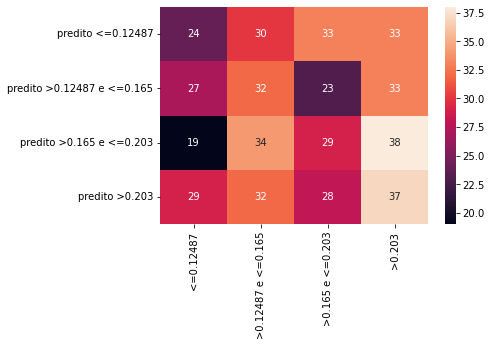

In [40]:
print('parâmetro de acerto ao acaso')
xlabels = ['<=0.12487', '>0.12487 e <=0.165', '>0.165 e <=0.203', '>0.203']
ylabels = ['predito <=0.12487', 'predito >0.12487 e <=0.165', 'predito >0.165 e <=0.203', 'predito >0.203']
sns.heatmap(cm, annot=True, fmt = 'g', xticklabels = xlabels, yticklabels = ylabels)

In [33]:
print(classification_report(y_test, y_pred_test_values))

              precision    recall  f1-score   support

           0       0.24      0.20      0.22       120
           1       0.25      0.28      0.26       115
           2       0.26      0.24      0.25       120
           3       0.26      0.29      0.28       126

    accuracy                           0.25       481
   macro avg       0.25      0.25      0.25       481
weighted avg       0.25      0.25      0.25       481



Esses são resultados de métricas de avaliação de um modelo de classificação. "Precision" representa a proporção de exemplos positivos que o modelo classificou corretamente. "Recall" representa a proporção de exemplos positivos que o modelo conseguiu identificar. "F1-score" é a média harmônica entre precisão e recall, fornecendo uma métrica equilibrada que reflete tanto a precisão quanto a capacidade de identificação do modelo. "Support" representa o número de exemplos na classe.

Com base nas métricas fornecidas, podemos ver que o modelo tem baixa precisão, baixo recall e baixo f1-score, o que indica que ele está tendo dificuldade em classificar corretamente os exemplos positivos e ainda não está conseguindo identificar a maioria deles, sendo que ele foi testado em 120 exemplos da classe.

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Ao comparar o erro de treinamento e o erro de validação em um gráfico, é possível realizar várias análises importantes. Algumas delas são:

- Overfitting: Se o erro de treinamento estiver caindo enquanto o erro de validação estiver aumentando, é provável que o modelo esteja sofrendo de overfitting. Isso significa que o modelo está se ajustando muito bem aos dados de treinamento, mas não está generalizando bem para os dados de validação.

- Underfitting: Se ambos os erros estiverem aumentando, é possível que o modelo esteja underfitting, ou seja, não está se ajustando suficientemente aos dados de treinamento e validação.

- Ideal fit: Se o erro de treinamento estiver diminuindo enquanto o erro de validação estiver diminuindo, é provável que o modelo esteja se ajustando de maneira adequada aos dados de treinamento e validação, ou seja, o modelo está aprendendo e generalizando corretamente.

Além disso, também é importante observar a velocidade de aprendizado, ou seja, quanto o erro está diminuindo com cada época. Uma diminuição muito lenta pode indicar que o modelo precisa de mais épocas ou que o tamanho do batch precisa ser ajustado.

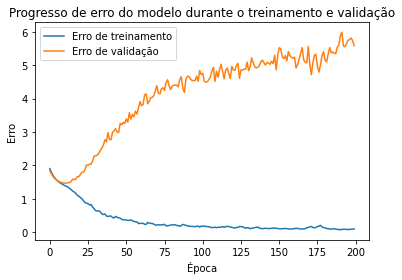

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Progresso de erro do modelo durante o treinamento e validação')
plt.xlabel('Época')
plt.ylabel('Erro')
plt.legend(['Erro de treinamento', 'Erro de validação'])

A análise dos gráficos de comparação da acurácia de treinamento e acurácia de validação pode fornecer informações importantes sobre o modelo e o seu desempenho. Aqui estão algumas das possíveis análises que se pode fazer:

- Overfitting: Se o gráfico de treinamento mostra uma acurácia muito alta e o gráfico de validação mostra uma acurácia muito baixa, isso pode indicar overfitting, ou seja, o modelo está memorizando o conjunto de treinamento, mas não é geral o suficiente para prever corretamente dados desconhecidos.

- Underfitting: Se ambos os gráficos de treinamento e validação mostram baixa acurácia, isso pode indicar sub-ajuste, ou seja, o modelo é muito simples e não está capturando a complexidade da relação entre as características e as classes.

- Convergência: Se o gráfico de treinamento mostra uma tendência crescente na acurácia e o gráfico de validação mostra uma tendência estacionária, isso pode indicar que o modelo está convergindo e que mais épocas de treinamento não seriam úteis.

- Viés: Se o gráfico de treinamento mostra uma acurácia muito alta, mas o gráfico de validação mostra uma acurácia muito baixa, isso pode indicar viés, ou seja, o modelo está otimizando a métrica de avaliação de forma inadequada e não está levando em conta todas as características do conjunto de dados.

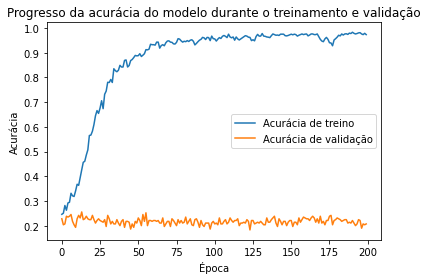

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Progresso da acurácia do modelo durante o treinamento e validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Acurácia de treino', 'Acurácia de validação'])

O **método de bootstrap** é uma técnica para estimar a **incerteza** em métricas com base em **amostragem com reposição**. A idéia é que, ao realizarmos várias amostragens de nosso conjunto de dados com reposição, podemos obter diferentes valores para nossa métrica. Então, podemos estimar a variabilidade da nossa métrica e, portanto, seu desvio padrão.

O método de bootstrap é frequentemente usado em métricas de modelos de machine learning, como precisão, recall e F1-score, para estimar o erro padrão. Isso pode ser útil para entender a incerteza em nossas métricas e para determinar se o desempenho de nossos modelos é estatisticamente significativo.

O método de bootstrap é uma técnica estatística usada para estimar o **desvio padrão** de uma métrica de desempenho da rede neural. Ele pode ser comparado ao ato de tirar amostras aleatórias de uma população para entender a variação da população. Da mesma forma, o método de bootstrap tira amostras aleatórias do conjunto de dados usado para treinar a rede e, em seguida, avalia o desempenho da rede usando a métrica escolhida. Isso é feito várias vezes, e a variação na métrica é usada para estimar o desvio padrão da métrica. É uma maneira de avaliar a incerteza associada às métricas de desempenho da rede e ajuda a entender se a rede está realmente tendo desempenho melhor ou pior do que o esperado.

O parâmetro "B" representa o número de vezes que o método bootstrap será aplicado para estimar o desvio padrão das métricas usadas para medir o desempenho da rede. Esse valor é usado para determinar o número de amostras aleatórias que serão selecionadas da base de dados de teste para realizar a avaliação do modelo. Quanto maior for o valor de "B", maior será a precisão da estimativa do desvio padrão, mas também aumentará o tempo de processamento.

In [37]:
#função que realiza o método bootstrap
def bootstrap(X_test, y_test, model, nn=False, B=250):
    #Creating dictionary to store results
    out={}
    out['accuracy']=[]
    out['macro avg']={}
    out['macro avg']['f1-score']=[]
    out['macro avg']['recall']=[]
    out['macro avg']['precision']=[]
    out['weighted avg']={}
    out['weighted avg']['f1-score']=[]
    out['weighted avg']['recall']=[]
    out['weighted avg']['precision']=[]

    #Running Bootstrap on the test set
    for b in tqdm(range(B)):
        ind = np.random.choice(range(y_test.shape[0]),y_test.shape[0])
        X_test_boot, y_test_boot = X_test[ind,:], y_test[ind]

        y_pred=model.predict(X_test_boot)
        
        if nn:
            y_pred=np.argmax(y_pred,axis=1)
            report=classification_report(y_test_boot, y_pred, labels=[0, 1, 2, 3], output_dict=True)
        else:
            report=classification_report(y_test_boot, y_pred, labels=[0, 1, 2, 3], output_dict=True)

        out['accuracy'].append(report['accuracy'])
        out['macro avg']['f1-score'].append(report['macro avg']['f1-score'])
        out['macro avg']['recall'].append(report['macro avg']['recall'])
        out['macro avg']['precision'].append(report['macro avg']['precision'])
        out['weighted avg']['f1-score'].append(report['weighted avg']['f1-score'])
        out['weighted avg']['recall'].append(report['weighted avg']['recall'])
        out['weighted avg']['precision'].append(report['weighted avg']['precision'])

    #Preparing output
    y_pred=model.predict(X_test)
    
    if nn:
        y_pred=np.argmax(y_pred,axis=1)
        report=classification_report(y_test, y_pred, labels=[0, 1, 2, 3], output_dict=True)
    else:
        report=classification_report(y_test, y_pred, labels=[0, 1, 2, 3], output_dict=True)

    out['accuracy'] = [report['accuracy'], np.std(out['accuracy'])]
    out['macro avg']['f1-score'] = [report['macro avg']['f1-score'], np.std(out['macro avg']['f1-score'])] 
    out['macro avg']['recall'] = [report['macro avg']['recall'], np.std(out['macro avg']['recall'])] 
    out['macro avg']['precision'] = [report['macro avg']['precision'], np.std(out['macro avg']['precision'])] 
    out['weighted avg']['f1-score'] = [report['weighted avg']['f1-score'], np.std(out['weighted avg']['f1-score'])] 
    out['weighted avg']['recall'] = [report['weighted avg']['recall'], np.std(out['weighted avg']['recall'])] 
    out['weighted avg']['precision'] = [report['weighted avg']['precision'], np.std(out['weighted avg']['precision'])]
    
    return out

In [38]:
report_boot=bootstrap(np.array(X_test), np.array(y_test), Dcnn, nn = True)

for i in ['accuracy', 'macro avg', 'weighted avg']:
    if i == 'accuracy':
        print("\n\n{:27}: {:.2f} ± {:.2f}".format(i, report_boot[i][0], report_boot[i][1]))
    for j in ['f1-score', 'recall', 'precision']:
        if i != 'accuracy':
            print("{:15}  {:10}: {:.2f} ± {:.2f}".format(i, j, report_boot[i][j][0], report_boot[i][j][1]))

  0%|                                                                                          | 0/250 [00:00<?, ?it/s]

16/16 [==============================] - 0s 11ms/step


  0%|▎                                                                                 | 1/250 [00:00<01:22,  3.03it/s]

16/16 [==============================] - 0s 11ms/step


  1%|▋                                                                                 | 2/250 [00:00<01:21,  3.02it/s]

16/16 [==============================] - 0s 12ms/step


  1%|▉                                                                                 | 3/250 [00:01<01:26,  2.85it/s]

16/16 [==============================] - 0s 11ms/step


  2%|█▎                                                                                | 4/250 [00:01<01:24,  2.92it/s]

16/16 [==============================] - 0s 11ms/step


  2%|█▋                                                                                | 5/250 [00:01<01:23,  2.94it/s]

16/16 [==============================] - 0s 11ms/step


  2%|█▉                                                                                | 6/250 [00:02<01:26,  2.81it/s]

16/16 [==============================] - 0s 11ms/step


  3%|██▎                                                                               | 7/250 [00:02<01:23,  2.90it/s]

16/16 [==============================] - 0s 11ms/step


  3%|██▌                                                                               | 8/250 [00:02<01:21,  2.95it/s]

16/16 [==============================] - 0s 11ms/step


  4%|██▉                                                                               | 9/250 [00:03<01:24,  2.85it/s]

16/16 [==============================] - 0s 11ms/step


  4%|███▏                                                                             | 10/250 [00:03<01:22,  2.90it/s]

16/16 [==============================] - 0s 11ms/step


  4%|███▌                                                                             | 11/250 [00:03<01:22,  2.90it/s]

16/16 [==============================] - 0s 11ms/step


  5%|███▉                                                                             | 12/250 [00:04<01:22,  2.87it/s]

16/16 [==============================] - 0s 10ms/step


  5%|████▏                                                                            | 13/250 [00:04<01:20,  2.94it/s]

16/16 [==============================] - 0s 11ms/step


  6%|████▌                                                                            | 14/250 [00:04<01:18,  2.99it/s]

16/16 [==============================] - 0s 11ms/step


  6%|████▊                                                                            | 15/250 [00:07<04:12,  1.08s/it]

16/16 [==============================] - 0s 12ms/step


  6%|█████▏                                                                           | 16/250 [00:07<03:19,  1.17it/s]

16/16 [==============================] - 0s 11ms/step


  7%|█████▌                                                                           | 17/250 [00:08<02:42,  1.44it/s]

16/16 [==============================] - 0s 10ms/step


  7%|█████▊                                                                           | 18/250 [00:08<02:16,  1.70it/s]

16/16 [==============================] - 0s 11ms/step


  8%|██████▏                                                                          | 19/250 [00:08<01:57,  1.97it/s]

16/16 [==============================] - 0s 11ms/step


  8%|██████▍                                                                          | 20/250 [00:09<01:43,  2.21it/s]

16/16 [==============================] - 0s 10ms/step


  8%|██████▊                                                                          | 21/250 [00:09<01:35,  2.40it/s]

16/16 [==============================] - 0s 13ms/step


  9%|███████▏                                                                         | 22/250 [00:09<01:30,  2.51it/s]

16/16 [==============================] - 0s 11ms/step


  9%|███████▍                                                                         | 23/250 [00:10<01:25,  2.65it/s]

16/16 [==============================] - 0s 10ms/step


 10%|███████▊                                                                         | 24/250 [00:10<01:22,  2.74it/s]

16/16 [==============================] - 0s 13ms/step


 10%|████████                                                                         | 25/250 [00:10<01:22,  2.73it/s]

16/16 [==============================] - 0s 11ms/step


 10%|████████▍                                                                        | 26/250 [00:11<01:18,  2.84it/s]

16/16 [==============================] - 0s 11ms/step


 11%|████████▋                                                                        | 27/250 [00:11<01:17,  2.86it/s]

16/16 [==============================] - 0s 13ms/step


 11%|█████████                                                                        | 28/250 [00:11<01:17,  2.86it/s]

16/16 [==============================] - 0s 11ms/step


 12%|█████████▍                                                                       | 29/250 [00:12<01:15,  2.94it/s]

16/16 [==============================] - 0s 11ms/step


 12%|█████████▋                                                                       | 30/250 [00:12<01:14,  2.94it/s]

16/16 [==============================] - 0s 12ms/step


 12%|██████████                                                                       | 31/250 [00:12<01:15,  2.91it/s]

16/16 [==============================] - 0s 11ms/step


 13%|██████████▎                                                                      | 32/250 [00:13<01:13,  2.96it/s]

16/16 [==============================] - 0s 11ms/step


 13%|██████████▋                                                                      | 33/250 [00:13<01:13,  2.95it/s]

16/16 [==============================] - 0s 12ms/step


 14%|███████████                                                                      | 34/250 [00:13<01:13,  2.94it/s]

16/16 [==============================] - 0s 11ms/step


 14%|███████████▎                                                                     | 35/250 [00:14<01:12,  2.97it/s]

16/16 [==============================] - 0s 11ms/step


 14%|███████████▋                                                                     | 36/250 [00:14<01:12,  2.93it/s]

16/16 [==============================] - 0s 12ms/step


 15%|███████████▉                                                                     | 37/250 [00:15<01:12,  2.93it/s]

16/16 [==============================] - 0s 10ms/step


 15%|████████████▎                                                                    | 38/250 [00:15<01:10,  2.99it/s]

16/16 [==============================] - 0s 11ms/step


 16%|████████████▋                                                                    | 39/250 [00:15<01:11,  2.95it/s]

16/16 [==============================] - 0s 12ms/step


 16%|████████████▉                                                                    | 40/250 [00:16<01:12,  2.90it/s]

16/16 [==============================] - 0s 11ms/step


 16%|█████████████▎                                                                   | 41/250 [00:16<01:10,  2.96it/s]

16/16 [==============================] - 0s 11ms/step


 17%|█████████████▌                                                                   | 42/250 [00:16<01:11,  2.92it/s]

16/16 [==============================] - 0s 11ms/step


 17%|█████████████▉                                                                   | 43/250 [00:17<01:11,  2.91it/s]

16/16 [==============================] - 0s 11ms/step


 18%|██████████████▎                                                                  | 44/250 [00:17<01:09,  2.95it/s]

16/16 [==============================] - 0s 11ms/step


 18%|██████████████▌                                                                  | 45/250 [00:17<01:09,  2.95it/s]

16/16 [==============================] - 0s 11ms/step


 18%|██████████████▉                                                                  | 46/250 [00:18<01:09,  2.95it/s]

16/16 [==============================] - 0s 11ms/step


 19%|███████████████▏                                                                 | 47/250 [00:18<01:08,  2.98it/s]

16/16 [==============================] - 0s 11ms/step


 19%|███████████████▌                                                                 | 48/250 [00:18<01:08,  2.96it/s]

16/16 [==============================] - 0s 11ms/step


 20%|███████████████▉                                                                 | 49/250 [00:19<01:07,  2.97it/s]

16/16 [==============================] - 0s 10ms/step


 20%|████████████████▏                                                                | 50/250 [00:19<01:06,  3.02it/s]

16/16 [==============================] - 0s 12ms/step


 20%|████████████████▌                                                                | 51/250 [00:19<01:07,  2.93it/s]

16/16 [==============================] - 0s 11ms/step


 21%|████████████████▊                                                                | 52/250 [00:20<01:07,  2.93it/s]

16/16 [==============================] - 0s 11ms/step


 21%|█████████████████▏                                                               | 53/250 [00:20<01:06,  2.95it/s]

16/16 [==============================] - 0s 11ms/step


 22%|█████████████████▍                                                               | 54/250 [00:20<01:06,  2.95it/s]

16/16 [==============================] - 0s 11ms/step


 22%|█████████████████▊                                                               | 55/250 [00:21<01:05,  2.98it/s]

16/16 [==============================] - 0s 11ms/step


 22%|██████████████████▏                                                              | 56/250 [00:21<01:04,  3.02it/s]

16/16 [==============================] - 0s 11ms/step


 23%|██████████████████▍                                                              | 57/250 [00:21<01:05,  2.97it/s]

16/16 [==============================] - 0s 11ms/step


 23%|██████████████████▊                                                              | 58/250 [00:22<01:06,  2.90it/s]

16/16 [==============================] - 0s 11ms/step


 24%|███████████████████                                                              | 59/250 [00:22<01:04,  2.95it/s]

16/16 [==============================] - 0s 11ms/step


 24%|███████████████████▍                                                             | 60/250 [00:22<01:05,  2.91it/s]

16/16 [==============================] - 0s 11ms/step


 24%|███████████████████▊                                                             | 61/250 [00:23<01:04,  2.91it/s]

16/16 [==============================] - 0s 11ms/step


 25%|████████████████████                                                             | 62/250 [00:23<01:03,  2.94it/s]

16/16 [==============================] - 0s 12ms/step


 25%|████████████████████▍                                                            | 63/250 [00:23<01:05,  2.84it/s]

16/16 [==============================] - 0s 11ms/step


 26%|████████████████████▋                                                            | 64/250 [00:24<01:04,  2.86it/s]

16/16 [==============================] - 0s 11ms/step


 26%|█████████████████████                                                            | 65/250 [00:24<01:04,  2.86it/s]

16/16 [==============================] - 0s 11ms/step


 26%|█████████████████████▍                                                           | 66/250 [00:24<01:05,  2.80it/s]

16/16 [==============================] - 0s 11ms/step


 27%|█████████████████████▋                                                           | 67/250 [00:25<01:03,  2.86it/s]

16/16 [==============================] - 0s 11ms/step


 27%|██████████████████████                                                           | 68/250 [00:25<01:02,  2.89it/s]

16/16 [==============================] - 0s 12ms/step


 28%|██████████████████████▎                                                          | 69/250 [00:25<01:04,  2.81it/s]

16/16 [==============================] - 0s 11ms/step


 28%|██████████████████████▋                                                          | 70/250 [00:26<01:02,  2.87it/s]

16/16 [==============================] - 0s 11ms/step


 28%|███████████████████████                                                          | 71/250 [00:26<01:01,  2.93it/s]

16/16 [==============================] - 0s 12ms/step


 29%|███████████████████████▎                                                         | 72/250 [00:26<01:01,  2.87it/s]

16/16 [==============================] - 0s 11ms/step


 29%|███████████████████████▋                                                         | 73/250 [00:27<01:00,  2.93it/s]

16/16 [==============================] - 0s 11ms/step


 30%|███████████████████████▉                                                         | 74/250 [00:27<00:59,  2.95it/s]

16/16 [==============================] - 0s 13ms/step


 30%|████████████████████████▎                                                        | 75/250 [00:28<01:01,  2.83it/s]

16/16 [==============================] - 0s 11ms/step


 30%|████████████████████████▌                                                        | 76/250 [00:28<01:00,  2.89it/s]

16/16 [==============================] - 0s 11ms/step


 31%|████████████████████████▉                                                        | 77/250 [00:28<00:58,  2.93it/s]

16/16 [==============================] - 0s 11ms/step


 31%|█████████████████████████▎                                                       | 78/250 [00:29<00:59,  2.89it/s]

16/16 [==============================] - 0s 10ms/step


 32%|█████████████████████████▌                                                       | 79/250 [00:29<00:57,  2.95it/s]

16/16 [==============================] - 0s 11ms/step


 32%|█████████████████████████▉                                                       | 80/250 [00:29<00:57,  2.98it/s]

16/16 [==============================] - 0s 11ms/step


 32%|██████████████████████████▏                                                      | 81/250 [00:30<00:58,  2.87it/s]

16/16 [==============================] - 0s 11ms/step


 33%|██████████████████████████▌                                                      | 82/250 [00:30<00:58,  2.89it/s]

16/16 [==============================] - 0s 11ms/step


 33%|██████████████████████████▉                                                      | 83/250 [00:30<00:58,  2.84it/s]

16/16 [==============================] - 0s 11ms/step


 34%|███████████████████████████▏                                                     | 84/250 [00:31<00:59,  2.77it/s]

16/16 [==============================] - 0s 11ms/step


 34%|███████████████████████████▌                                                     | 85/250 [00:31<00:57,  2.85it/s]

16/16 [==============================] - 0s 11ms/step


 34%|███████████████████████████▊                                                     | 86/250 [00:31<00:56,  2.88it/s]

16/16 [==============================] - 0s 11ms/step


 35%|████████████████████████████▏                                                    | 87/250 [00:32<00:57,  2.83it/s]

16/16 [==============================] - 0s 11ms/step


 35%|████████████████████████████▌                                                    | 88/250 [00:32<00:55,  2.90it/s]

16/16 [==============================] - 0s 12ms/step


 36%|████████████████████████████▊                                                    | 89/250 [00:32<00:55,  2.90it/s]

16/16 [==============================] - 0s 11ms/step


 36%|█████████████████████████████▏                                                   | 90/250 [00:33<00:55,  2.86it/s]

16/16 [==============================] - 0s 11ms/step


 36%|█████████████████████████████▍                                                   | 91/250 [00:33<00:55,  2.87it/s]

16/16 [==============================] - 0s 12ms/step


 37%|█████████████████████████████▊                                                   | 92/250 [00:33<00:55,  2.87it/s]

16/16 [==============================] - 0s 11ms/step


 37%|██████████████████████████████▏                                                  | 93/250 [00:34<00:54,  2.86it/s]

16/16 [==============================] - 0s 11ms/step


 38%|██████████████████████████████▍                                                  | 94/250 [00:34<00:53,  2.89it/s]

16/16 [==============================] - 0s 14ms/step


 38%|██████████████████████████████▊                                                  | 95/250 [00:35<00:55,  2.80it/s]

16/16 [==============================] - 0s 11ms/step


 38%|███████████████████████████████                                                  | 96/250 [00:35<00:55,  2.76it/s]

16/16 [==============================] - 0s 11ms/step


 39%|███████████████████████████████▍                                                 | 97/250 [00:35<00:53,  2.85it/s]

16/16 [==============================] - 0s 12ms/step


 39%|███████████████████████████████▊                                                 | 98/250 [00:36<00:52,  2.88it/s]

16/16 [==============================] - 0s 11ms/step


 40%|████████████████████████████████                                                 | 99/250 [00:36<00:52,  2.86it/s]

16/16 [==============================] - 0s 11ms/step


 40%|████████████████████████████████                                                | 100/250 [00:36<00:52,  2.85it/s]

16/16 [==============================] - 0s 11ms/step


 40%|████████████████████████████████▎                                               | 101/250 [00:37<00:51,  2.87it/s]

16/16 [==============================] - 0s 11ms/step


 41%|████████████████████████████████▋                                               | 102/250 [00:37<00:51,  2.87it/s]

16/16 [==============================] - 0s 11ms/step


 41%|████████████████████████████████▉                                               | 103/250 [00:37<00:50,  2.91it/s]

16/16 [==============================] - 0s 11ms/step


 42%|█████████████████████████████████▎                                              | 104/250 [00:38<00:50,  2.90it/s]

16/16 [==============================] - 0s 12ms/step


 42%|█████████████████████████████████▌                                              | 105/250 [00:38<00:51,  2.84it/s]

16/16 [==============================] - 0s 12ms/step


 42%|█████████████████████████████████▉                                              | 106/250 [00:38<00:50,  2.83it/s]

16/16 [==============================] - 0s 11ms/step


 43%|██████████████████████████████████▏                                             | 107/250 [00:39<00:49,  2.88it/s]

16/16 [==============================] - 0s 11ms/step


 43%|██████████████████████████████████▌                                             | 108/250 [00:39<00:49,  2.87it/s]

16/16 [==============================] - 0s 12ms/step


 44%|██████████████████████████████████▉                                             | 109/250 [00:39<00:49,  2.87it/s]

16/16 [==============================] - 0s 11ms/step


 44%|███████████████████████████████████▏                                            | 110/250 [00:40<00:48,  2.89it/s]

16/16 [==============================] - 0s 11ms/step


 44%|███████████████████████████████████▌                                            | 111/250 [00:40<00:48,  2.86it/s]

16/16 [==============================] - 0s 12ms/step


 45%|███████████████████████████████████▊                                            | 112/250 [00:40<00:48,  2.87it/s]

16/16 [==============================] - 0s 12ms/step


 45%|████████████████████████████████████▏                                           | 113/250 [00:41<00:47,  2.89it/s]

16/16 [==============================] - 0s 11ms/step


 46%|████████████████████████████████████▍                                           | 114/250 [00:41<00:47,  2.89it/s]

16/16 [==============================] - 0s 12ms/step


 46%|████████████████████████████████████▊                                           | 115/250 [00:41<00:46,  2.90it/s]

16/16 [==============================] - 0s 10ms/step


 46%|█████████████████████████████████████                                           | 116/250 [00:42<00:45,  2.96it/s]

16/16 [==============================] - 0s 11ms/step


 47%|█████████████████████████████████████▍                                          | 117/250 [00:42<00:45,  2.94it/s]

16/16 [==============================] - 0s 12ms/step


 47%|█████████████████████████████████████▊                                          | 118/250 [00:42<00:44,  2.94it/s]

16/16 [==============================] - 0s 11ms/step


 48%|██████████████████████████████████████                                          | 119/250 [00:43<00:44,  2.97it/s]

16/16 [==============================] - 0s 11ms/step


 48%|██████████████████████████████████████▍                                         | 120/250 [00:43<00:44,  2.92it/s]

16/16 [==============================] - 0s 12ms/step


 48%|██████████████████████████████████████▋                                         | 121/250 [00:43<00:44,  2.92it/s]

16/16 [==============================] - 0s 11ms/step


 49%|███████████████████████████████████████                                         | 122/250 [00:44<00:43,  2.96it/s]

16/16 [==============================] - 0s 11ms/step


 49%|███████████████████████████████████████▎                                        | 123/250 [00:44<00:42,  2.96it/s]

16/16 [==============================] - 0s 12ms/step


 50%|███████████████████████████████████████▋                                        | 124/250 [00:44<00:43,  2.93it/s]

16/16 [==============================] - 0s 11ms/step


 50%|████████████████████████████████████████                                        | 125/250 [00:45<00:42,  2.94it/s]

16/16 [==============================] - 0s 11ms/step


 50%|████████████████████████████████████████▎                                       | 126/250 [00:45<00:43,  2.87it/s]

16/16 [==============================] - 0s 11ms/step


 51%|████████████████████████████████████████▋                                       | 127/250 [00:46<00:42,  2.86it/s]

16/16 [==============================] - 0s 11ms/step


 51%|████████████████████████████████████████▉                                       | 128/250 [00:46<00:42,  2.89it/s]

16/16 [==============================] - 0s 11ms/step


 52%|█████████████████████████████████████████▎                                      | 129/250 [00:46<00:41,  2.89it/s]

16/16 [==============================] - 0s 11ms/step


 52%|█████████████████████████████████████████▌                                      | 130/250 [00:47<00:41,  2.89it/s]

16/16 [==============================] - 0s 12ms/step


 52%|█████████████████████████████████████████▉                                      | 131/250 [00:47<00:41,  2.89it/s]

16/16 [==============================] - 0s 11ms/step


 53%|██████████████████████████████████████████▏                                     | 132/250 [00:47<00:40,  2.88it/s]

16/16 [==============================] - 0s 11ms/step


 53%|██████████████████████████████████████████▌                                     | 133/250 [00:48<00:40,  2.87it/s]

16/16 [==============================] - 0s 11ms/step


 54%|██████████████████████████████████████████▉                                     | 134/250 [00:48<00:40,  2.88it/s]

16/16 [==============================] - 0s 11ms/step


 54%|███████████████████████████████████████████▏                                    | 135/250 [00:48<00:40,  2.87it/s]

16/16 [==============================] - 0s 10ms/step


 54%|███████████████████████████████████████████▌                                    | 136/250 [00:49<00:39,  2.88it/s]

16/16 [==============================] - 0s 11ms/step


 55%|███████████████████████████████████████████▊                                    | 137/250 [00:49<00:38,  2.91it/s]

16/16 [==============================] - 0s 11ms/step


 55%|████████████████████████████████████████████▏                                   | 138/250 [00:49<00:38,  2.88it/s]

16/16 [==============================] - 0s 11ms/step


 56%|████████████████████████████████████████████▍                                   | 139/250 [00:50<00:38,  2.89it/s]

16/16 [==============================] - 0s 11ms/step


 56%|████████████████████████████████████████████▊                                   | 140/250 [00:50<00:37,  2.90it/s]

16/16 [==============================] - 0s 12ms/step


 56%|█████████████████████████████████████████████                                   | 141/250 [00:50<00:38,  2.83it/s]

16/16 [==============================] - 0s 11ms/step


 57%|█████████████████████████████████████████████▍                                  | 142/250 [00:51<00:37,  2.87it/s]

16/16 [==============================] - 0s 11ms/step


 57%|█████████████████████████████████████████████▊                                  | 143/250 [00:51<00:36,  2.90it/s]

16/16 [==============================] - 0s 12ms/step


 58%|██████████████████████████████████████████████                                  | 144/250 [00:51<00:37,  2.85it/s]

16/16 [==============================] - 0s 11ms/step


 58%|██████████████████████████████████████████████▍                                 | 145/250 [00:52<00:36,  2.88it/s]

16/16 [==============================] - 0s 11ms/step


 58%|██████████████████████████████████████████████▋                                 | 146/250 [00:52<00:35,  2.90it/s]

16/16 [==============================] - 0s 12ms/step


 59%|███████████████████████████████████████████████                                 | 147/250 [00:53<00:36,  2.83it/s]

16/16 [==============================] - 0s 11ms/step


 59%|███████████████████████████████████████████████▎                                | 148/250 [00:53<00:35,  2.85it/s]

16/16 [==============================] - 0s 11ms/step


 60%|███████████████████████████████████████████████▋                                | 149/250 [00:53<00:34,  2.89it/s]

16/16 [==============================] - 0s 11ms/step


 60%|████████████████████████████████████████████████                                | 150/250 [00:54<00:35,  2.85it/s]

16/16 [==============================] - 0s 11ms/step


 60%|████████████████████████████████████████████████▎                               | 151/250 [00:54<00:34,  2.90it/s]

16/16 [==============================] - 0s 11ms/step


 61%|████████████████████████████████████████████████▋                               | 152/250 [00:54<00:33,  2.91it/s]

16/16 [==============================] - 0s 11ms/step


 61%|████████████████████████████████████████████████▉                               | 153/250 [00:55<00:34,  2.82it/s]

16/16 [==============================] - 0s 11ms/step


 62%|█████████████████████████████████████████████████▎                              | 154/250 [00:55<00:33,  2.87it/s]

16/16 [==============================] - 0s 11ms/step


 62%|█████████████████████████████████████████████████▌                              | 155/250 [00:55<00:32,  2.91it/s]

16/16 [==============================] - 0s 11ms/step


 62%|█████████████████████████████████████████████████▉                              | 156/250 [00:56<00:32,  2.86it/s]

16/16 [==============================] - 0s 11ms/step


 63%|██████████████████████████████████████████████████▏                             | 157/250 [00:56<00:32,  2.90it/s]

16/16 [==============================] - 0s 11ms/step


 63%|██████████████████████████████████████████████████▌                             | 158/250 [00:56<00:31,  2.92it/s]

16/16 [==============================] - 0s 11ms/step


 64%|██████████████████████████████████████████████████▉                             | 159/250 [00:57<00:31,  2.87it/s]

16/16 [==============================] - 0s 11ms/step


 64%|███████████████████████████████████████████████████▏                            | 160/250 [00:57<00:30,  2.94it/s]

16/16 [==============================] - 0s 11ms/step


 64%|███████████████████████████████████████████████████▌                            | 161/250 [00:57<00:30,  2.95it/s]

16/16 [==============================] - 0s 11ms/step


 65%|███████████████████████████████████████████████████▊                            | 162/250 [00:58<00:30,  2.88it/s]

16/16 [==============================] - 0s 11ms/step


 65%|████████████████████████████████████████████████████▏                           | 163/250 [00:58<00:29,  2.93it/s]

16/16 [==============================] - 0s 13ms/step


 66%|████████████████████████████████████████████████████▍                           | 164/250 [00:58<00:29,  2.88it/s]

16/16 [==============================] - 0s 11ms/step


 66%|████████████████████████████████████████████████████▊                           | 165/250 [00:59<00:29,  2.88it/s]

16/16 [==============================] - 0s 11ms/step


 66%|█████████████████████████████████████████████████████                           | 166/250 [00:59<00:28,  2.93it/s]

16/16 [==============================] - 0s 12ms/step


 67%|█████████████████████████████████████████████████████▍                          | 167/250 [00:59<00:28,  2.88it/s]

16/16 [==============================] - 0s 11ms/step


 67%|█████████████████████████████████████████████████████▊                          | 168/250 [01:00<00:28,  2.90it/s]

16/16 [==============================] - 0s 11ms/step


 68%|██████████████████████████████████████████████████████                          | 169/250 [01:00<00:27,  2.95it/s]

16/16 [==============================] - 0s 13ms/step


 68%|██████████████████████████████████████████████████████▍                         | 170/250 [01:00<00:27,  2.89it/s]

16/16 [==============================] - 0s 12ms/step


 68%|██████████████████████████████████████████████████████▋                         | 171/250 [01:01<00:28,  2.80it/s]

16/16 [==============================] - 0s 11ms/step


 69%|███████████████████████████████████████████████████████                         | 172/250 [01:01<00:27,  2.86it/s]

16/16 [==============================] - 0s 13ms/step


 69%|███████████████████████████████████████████████████████▎                        | 173/250 [01:02<00:27,  2.84it/s]

16/16 [==============================] - 0s 11ms/step


 70%|███████████████████████████████████████████████████████▋                        | 174/250 [01:02<00:26,  2.85it/s]

16/16 [==============================] - 0s 11ms/step


 70%|████████████████████████████████████████████████████████                        | 175/250 [01:02<00:25,  2.89it/s]

16/16 [==============================] - 0s 12ms/step


 70%|████████████████████████████████████████████████████████▎                       | 176/250 [01:03<00:25,  2.88it/s]

16/16 [==============================] - 0s 11ms/step


 71%|████████████████████████████████████████████████████████▋                       | 177/250 [01:03<00:25,  2.84it/s]

16/16 [==============================] - 0s 12ms/step


 71%|████████████████████████████████████████████████████████▉                       | 178/250 [01:03<00:25,  2.86it/s]

16/16 [==============================] - 0s 11ms/step


 72%|█████████████████████████████████████████████████████████▎                      | 179/250 [01:04<00:24,  2.86it/s]

16/16 [==============================] - 0s 11ms/step


 72%|█████████████████████████████████████████████████████████▌                      | 180/250 [01:04<00:24,  2.88it/s]

16/16 [==============================] - 0s 11ms/step


 72%|█████████████████████████████████████████████████████████▉                      | 181/250 [01:04<00:23,  2.91it/s]

16/16 [==============================] - 0s 12ms/step


 73%|██████████████████████████████████████████████████████████▏                     | 182/250 [01:05<00:23,  2.88it/s]

16/16 [==============================] - 0s 11ms/step


 73%|██████████████████████████████████████████████████████████▌                     | 183/250 [01:05<00:23,  2.84it/s]

16/16 [==============================] - 0s 11ms/step


 74%|██████████████████████████████████████████████████████████▉                     | 184/250 [01:05<00:23,  2.86it/s]

16/16 [==============================] - 0s 12ms/step


 74%|███████████████████████████████████████████████████████████▏                    | 185/250 [01:06<00:22,  2.86it/s]

16/16 [==============================] - 0s 11ms/step


 74%|███████████████████████████████████████████████████████████▌                    | 186/250 [01:06<00:22,  2.85it/s]

16/16 [==============================] - 0s 12ms/step


 75%|███████████████████████████████████████████████████████████▊                    | 187/250 [01:06<00:22,  2.81it/s]

16/16 [==============================] - 0s 11ms/step


 75%|████████████████████████████████████████████████████████████▏                   | 188/250 [01:07<00:21,  2.86it/s]

16/16 [==============================] - 0s 11ms/step


 76%|████████████████████████████████████████████████████████████▍                   | 189/250 [01:07<00:21,  2.87it/s]

16/16 [==============================] - 0s 12ms/step


 76%|████████████████████████████████████████████████████████████▊                   | 190/250 [01:07<00:21,  2.84it/s]

16/16 [==============================] - 0s 10ms/step


 76%|█████████████████████████████████████████████████████████████                   | 191/250 [01:08<00:20,  2.88it/s]

16/16 [==============================] - 0s 11ms/step


 77%|█████████████████████████████████████████████████████████████▍                  | 192/250 [01:08<00:20,  2.86it/s]

16/16 [==============================] - 0s 12ms/step


 77%|█████████████████████████████████████████████████████████████▊                  | 193/250 [01:09<00:19,  2.85it/s]

16/16 [==============================] - 0s 11ms/step


 78%|██████████████████████████████████████████████████████████████                  | 194/250 [01:09<00:19,  2.91it/s]

16/16 [==============================] - 0s 11ms/step


 78%|██████████████████████████████████████████████████████████████▍                 | 195/250 [01:09<00:19,  2.87it/s]

16/16 [==============================] - 0s 12ms/step


 78%|██████████████████████████████████████████████████████████████▋                 | 196/250 [01:10<00:18,  2.86it/s]

16/16 [==============================] - 0s 11ms/step


 79%|███████████████████████████████████████████████████████████████                 | 197/250 [01:10<00:18,  2.90it/s]

16/16 [==============================] - 0s 11ms/step


 79%|███████████████████████████████████████████████████████████████▎                | 198/250 [01:10<00:18,  2.89it/s]

16/16 [==============================] - 0s 12ms/step


 80%|███████████████████████████████████████████████████████████████▋                | 199/250 [01:11<00:17,  2.89it/s]

16/16 [==============================] - 0s 11ms/step


 80%|████████████████████████████████████████████████████████████████                | 200/250 [01:11<00:17,  2.92it/s]

16/16 [==============================] - 0s 11ms/step


 80%|████████████████████████████████████████████████████████████████▎               | 201/250 [01:11<00:16,  2.89it/s]

16/16 [==============================] - 0s 11ms/step


 81%|████████████████████████████████████████████████████████████████▋               | 202/250 [01:12<00:16,  2.89it/s]

16/16 [==============================] - 0s 11ms/step


 81%|████████████████████████████████████████████████████████████████▉               | 203/250 [01:12<00:15,  2.95it/s]

16/16 [==============================] - 0s 11ms/step


 82%|█████████████████████████████████████████████████████████████████▎              | 204/250 [01:12<00:15,  2.94it/s]

16/16 [==============================] - 0s 11ms/step


 82%|█████████████████████████████████████████████████████████████████▌              | 205/250 [01:13<00:15,  2.91it/s]

16/16 [==============================] - 0s 11ms/step


 82%|█████████████████████████████████████████████████████████████████▉              | 206/250 [01:13<00:14,  2.94it/s]

16/16 [==============================] - 0s 11ms/step


 83%|██████████████████████████████████████████████████████████████████▏             | 207/250 [01:13<00:14,  2.90it/s]

16/16 [==============================] - 0s 11ms/step


 83%|██████████████████████████████████████████████████████████████████▌             | 208/250 [01:14<00:14,  2.91it/s]

16/16 [==============================] - 0s 11ms/step


 84%|██████████████████████████████████████████████████████████████████▉             | 209/250 [01:14<00:13,  2.95it/s]

16/16 [==============================] - 0s 11ms/step


 84%|███████████████████████████████████████████████████████████████████▏            | 210/250 [01:14<00:13,  2.91it/s]

16/16 [==============================] - 0s 11ms/step


 84%|███████████████████████████████████████████████████████████████████▌            | 211/250 [01:15<00:13,  2.92it/s]

16/16 [==============================] - 0s 11ms/step


 85%|███████████████████████████████████████████████████████████████████▊            | 212/250 [01:15<00:12,  2.94it/s]

16/16 [==============================] - 0s 12ms/step


 85%|████████████████████████████████████████████████████████████████████▏           | 213/250 [01:15<00:12,  2.86it/s]

16/16 [==============================] - 0s 11ms/step


 86%|████████████████████████████████████████████████████████████████████▍           | 214/250 [01:16<00:12,  2.91it/s]

16/16 [==============================] - 0s 11ms/step


 86%|████████████████████████████████████████████████████████████████████▊           | 215/250 [01:16<00:11,  2.92it/s]

16/16 [==============================] - 0s 13ms/step


 86%|█████████████████████████████████████████████████████████████████████           | 216/250 [01:16<00:12,  2.83it/s]

16/16 [==============================] - 0s 11ms/step


 87%|█████████████████████████████████████████████████████████████████████▍          | 217/250 [01:17<00:11,  2.89it/s]

16/16 [==============================] - 0s 11ms/step


 87%|█████████████████████████████████████████████████████████████████████▊          | 218/250 [01:17<00:10,  2.94it/s]

16/16 [==============================] - 0s 12ms/step


 88%|██████████████████████████████████████████████████████████████████████          | 219/250 [01:17<00:10,  2.85it/s]

16/16 [==============================] - 0s 11ms/step


 88%|██████████████████████████████████████████████████████████████████████▍         | 220/250 [01:18<00:10,  2.92it/s]

16/16 [==============================] - 0s 11ms/step


 88%|██████████████████████████████████████████████████████████████████████▋         | 221/250 [01:18<00:09,  2.96it/s]

16/16 [==============================] - 0s 12ms/step


 89%|███████████████████████████████████████████████████████████████████████         | 222/250 [01:18<00:09,  2.86it/s]

16/16 [==============================] - 0s 11ms/step


 89%|███████████████████████████████████████████████████████████████████████▎        | 223/250 [01:19<00:09,  2.91it/s]

16/16 [==============================] - 0s 11ms/step


 90%|███████████████████████████████████████████████████████████████████████▋        | 224/250 [01:19<00:08,  2.93it/s]

16/16 [==============================] - 0s 14ms/step


 90%|████████████████████████████████████████████████████████████████████████        | 225/250 [01:20<00:09,  2.76it/s]

16/16 [==============================] - 0s 11ms/step


 90%|████████████████████████████████████████████████████████████████████████▎       | 226/250 [01:20<00:08,  2.81it/s]

16/16 [==============================] - 0s 11ms/step


 91%|████████████████████████████████████████████████████████████████████████▋       | 227/250 [01:20<00:08,  2.87it/s]

16/16 [==============================] - 0s 12ms/step


 91%|████████████████████████████████████████████████████████████████████████▉       | 228/250 [01:21<00:07,  2.82it/s]

16/16 [==============================] - 0s 11ms/step


 92%|█████████████████████████████████████████████████████████████████████████▎      | 229/250 [01:21<00:07,  2.84it/s]

16/16 [==============================] - 0s 11ms/step


 92%|█████████████████████████████████████████████████████████████████████████▌      | 230/250 [01:21<00:06,  2.88it/s]

16/16 [==============================] - 0s 11ms/step


 92%|█████████████████████████████████████████████████████████████████████████▉      | 231/250 [01:22<00:06,  2.77it/s]

16/16 [==============================] - 0s 11ms/step


 93%|██████████████████████████████████████████████████████████████████████████▏     | 232/250 [01:22<00:06,  2.84it/s]

16/16 [==============================] - 0s 12ms/step


 93%|██████████████████████████████████████████████████████████████████████████▌     | 233/250 [01:22<00:05,  2.84it/s]

16/16 [==============================] - 0s 11ms/step


 94%|██████████████████████████████████████████████████████████████████████████▉     | 234/250 [01:23<00:05,  2.83it/s]

16/16 [==============================] - 0s 11ms/step


 94%|███████████████████████████████████████████████████████████████████████████▏    | 235/250 [01:23<00:05,  2.88it/s]

16/16 [==============================] - 0s 12ms/step


 94%|███████████████████████████████████████████████████████████████████████████▌    | 236/250 [01:23<00:04,  2.88it/s]

16/16 [==============================] - 0s 11ms/step


 95%|███████████████████████████████████████████████████████████████████████████▊    | 237/250 [01:24<00:04,  2.88it/s]

16/16 [==============================] - 0s 11ms/step


 95%|████████████████████████████████████████████████████████████████████████████▏   | 238/250 [01:24<00:04,  2.94it/s]

16/16 [==============================] - 0s 12ms/step


 96%|████████████████████████████████████████████████████████████████████████████▍   | 239/250 [01:24<00:03,  2.91it/s]

16/16 [==============================] - 0s 11ms/step


 96%|████████████████████████████████████████████████████████████████████████████▊   | 240/250 [01:25<00:03,  2.88it/s]

16/16 [==============================] - 0s 11ms/step


 96%|█████████████████████████████████████████████████████████████████████████████   | 241/250 [01:25<00:03,  2.94it/s]

16/16 [==============================] - 0s 15ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 242/250 [01:26<00:02,  2.81it/s]

16/16 [==============================] - 0s 11ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 243/250 [01:26<00:02,  2.83it/s]

16/16 [==============================] - 0s 11ms/step


 98%|██████████████████████████████████████████████████████████████████████████████  | 244/250 [01:26<00:02,  2.90it/s]

16/16 [==============================] - 0s 12ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 245/250 [01:27<00:01,  2.89it/s]

16/16 [==============================] - 0s 11ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 246/250 [01:27<00:01,  2.91it/s]

16/16 [==============================] - 0s 11ms/step


 99%|███████████████████████████████████████████████████████████████████████████████ | 247/250 [01:27<00:01,  2.92it/s]

16/16 [==============================] - 0s 12ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▎| 248/250 [01:28<00:00,  2.87it/s]

16/16 [==============================] - 0s 11ms/step


100%|███████████████████████████████████████████████████████████████████████████████▋| 249/250 [01:28<00:00,  2.87it/s]

16/16 [==============================] - 0s 11ms/step


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [01:28<00:00,  2.82it/s]

 5/16 [========>.....................] - ETA: 0s

16/16 [==============================] - 0s 12ms/step


accuracy                   : 0.25 ± 0.02
macro avg        f1-score  : 0.25 ± 0.02
macro avg        recall    : 0.25 ± 0.02
macro avg        precision : 0.25 ± 0.02
weighted avg     f1-score  : 0.25 ± 0.02
weighted avg     recall    : 0.25 ± 0.02
weighted avg     precision : 0.25 ± 0.02
